<a href="https://colab.research.google.com/github/yannhabib/Logistic-Regression-with-R/blob/main/Kopie_von_Jana_pred_ana_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import panda library to handle dataframes

import pandas as pd

In [ ]:
# import clean dataset

df = pd.read_csv('predictive_analysis_data_clean.csv', sep = ';')

<ipython-input-3-c44328592e2b>:3: DtypeWarning: Columns (6,8,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('predictive_analysis_data_clean.csv', sep = ';')


In [ ]:
# view df columns

df.columns

Index(['company_name', 'status_label', 'year', 'Current assets',
       'Cost of goods sold', 'Depreciation and amortization', 'EBITDA',
       'Inventory', 'Net Income', 'Total Receivables', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18'],
      dtype='object')

In [ ]:
# view data types

print(df.dtypes)

company_name                     object
status_label                     object
year                              int64
Current assets                    int64
Cost of goods sold               object
Depreciation and amortization    object
EBITDA                           object
Inventory                        object
Net Income                       object
Total Receivables                object
X8                                int64
X9                                int64
X10                               int64
X11                              object
X12                               int64
X13                              object
X14                               int64
X15                               int64
X16                               int64
X17                               int64
X18                              object
dtype: object


In [ ]:
## convert object datatypes for numeric columns to numeric

# list of columns to convert from object to int64
columns_to_convert = ['Cost of goods sold', 'Depreciation and amortization', 'EBITDA',
                      'Inventory', 'Net Income', 'Total Receivables', 'X11', 'X13', 'X18']

# convert object columns to int64
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

# print the data types to confirm the conversion
print(df.dtypes)

company_name                      object
status_label                      object
year                               int64
Current assets                     int64
Cost of goods sold               float64
Depreciation and amortization    float64
EBITDA                           float64
Inventory                        float64
Net Income                       float64
Total Receivables                float64
X8                                 int64
X9                                 int64
X10                                int64
X11                              float64
X12                                int64
X13                              float64
X14                                int64
X15                                int64
X16                                int64
X17                                int64
X18                              float64
dtype: object


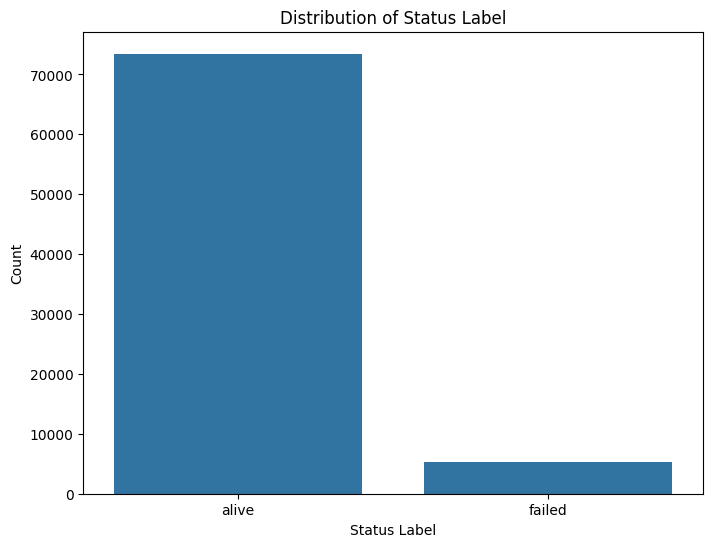

In [ ]:
## plot target variable and check for imbalancedness

# import matplotlib library for ploting grpahs
import matplotlib.pyplot as plt
import seaborn as sns

# count the occurrences of each category in the target variable
target_counts = df['status_label'].value_counts()

# plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Status Label')
plt.xlabel('Status Label')
plt.ylabel('Count')
plt.show()


# extremly imbalanced dataset

In [ ]:
## naming columns consistently

# creating a dictionary for the concerned columns
renaming_dict = {
    'Current assets': 'current_assets',
    'Cost of goods sold': 'cost_of_goods_sold',
    'Depreciation and amortization': 'depreciation_and_amortization',
    'EBITDA': 'ebitda',
    'Inventory': 'inventory',
    'Net Income': 'net_income',
    'Total Receivables': 'total_receivables',
}

In [ ]:
# rename the columns
df.rename(columns=renaming_dict, inplace=True)
df.columns

Index(['company_name', 'status_label', 'year', 'current_assets',
       'cost_of_goods_sold', 'depreciation_and_amortization', 'ebitda',
       'inventory', 'net_income', 'total_receivables', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18'],
      dtype='object')

In [ ]:
## encoding target variable

# import lable encoder from sklearn
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
label_encoder = LabelEncoder()

# encode the values of status_label
df['status_label_encoded'] = label_encoder.fit_transform(df['status_label'])

# check the mapping of original categories to encoded values
encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoded mapping:", encoded_mapping)


Encoded mapping: {'alive': 0, 'failed': 1}


In [ ]:
# drop samples with missing values before applying SMOTE
df_dropna = df.dropna()

In [ ]:
# logistic regression formula

formula = 'status_label_encoded ~ current_assets + cost_of_goods_sold + depreciation_and_amortization + ebitda + ' + \
          'inventory + net_income + total_receivables + X8 + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18'


In [ ]:
# fit model to dataset

import statsmodels.formula.api as smf
model = smf.logit(formula, data=df_dropna).fit()

         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# print model summary

print(model.summary())

                            Logit Regression Results                            
Dep. Variable:     status_label_encoded   No. Observations:                44981
Model:                            Logit   Df Residuals:                    44962
Method:                             MLE   Df Model:                           18
Date:                  Sun, 02 Jun 2024   Pseudo R-squ.:                    -inf
Time:                          22:01:31   Log-Likelihood:                   -inf
converged:                        False   LL-Null:                       -11552.
Covariance Type:              nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.3825      0.020   -116.237      0.000      -2.423      -2.342
current_assets                -3.668e-07   5.96e-08     -6